# Proyek Analisis Data Penyakit jantung

## Menyiapkan library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import os
import seaborn as sns
from tabulate import tabulate

## Data Wrangling

In [ ]:
jantung_data = pd.read_csv("/content/heart.csv")
jantung_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Menilai tabel `jantung_data`

In [ ]:
jantung_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
jantung_data.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
print("Jumlah duplikasi: ", jantung_data.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
jantung_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Cleaning Data

#### Membersihkan tabel `jantung_data`

In [ ]:
jantung_data['Sex'] = jantung_data['Sex'].astype('category')

In [ ]:
jantung_data = jantung_data.rename(columns={'Sex': 'Gender'})

In [ ]:
jantung_data[jantung_data['Cholesterol'] == 0]

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [ ]:
median_chol = jantung_data[jantung_data['Cholesterol'] != 0]['Cholesterol'].median()
jantung_data['Cholesterol'] = jantung_data['Cholesterol'].replace(0, median_chol)


In [ ]:
jantung_data[jantung_data['RestingBP'] == 0]

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,237,0,Normal,155,N,1.5,Flat,1


In [ ]:
jantung_data['RestingBP'] = jantung_data['RestingBP'].replace(0, median_chol)

In [ ]:
jantung_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.654684,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.317315,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,237.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
jantung_data[jantung_data['Oldpeak'] < 0]

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,237,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,237,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,237,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,237,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,237,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,237,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,237,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,237,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,237,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,237,1,Normal,72,Y,-0.5,Flat,1


In [ ]:
jantung_data[jantung_data['Oldpeak'] == jantung_data['Oldpeak'].min()]


,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
324,46,M,ASY,100,237,1,ST,133,N,-2.6,Flat,1


In [ ]:
jantung_data[jantung_data['Oldpeak'] < 0].shape[0]


13

In [ ]:
jantung_data['Oldpeak'] = jantung_data['Oldpeak'].abs()

In [ ]:
jantung_data[jantung_data['Oldpeak'] < 0].shape[0]

0

In [ ]:
jantung_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.654684,243.204793,0.233115,136.809368,0.915251,0.553377
std,9.432617,18.317315,53.401297,0.423046,25.460334,1.042712,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,237.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Ubah nilai Y -> Yes dan N -> No
jantung_data['ExerciseAngina'] = jantung_data['ExerciseAngina'].replace({'Y': 'Yes', 'N': 'No'})


In [ ]:
jantung_data.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,No,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,No,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,No,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Yes,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,No,0.0,Up,0


In [ ]:
def kategori_usia(age):
    if age < 40:
        return 'Muda'
    elif age < 60:
        return 'Paruh Baya'
    else:
        return 'Lansia'

jantung_data['KategoriUsia'] = jantung_data['Age'].apply(kategori_usia)

In [ ]:
jantung_data.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,KategoriUsia
0,40,M,ATA,140,289,0,Normal,172,No,0.0,Up,0,Paruh Baya
1,49,F,NAP,160,180,0,Normal,156,No,1.0,Flat,1,Paruh Baya
2,37,M,ATA,130,283,0,ST,98,No,0.0,Up,0,Muda
3,48,F,ASY,138,214,0,Normal,108,Yes,1.5,Flat,1,Paruh Baya
4,54,M,NAP,150,195,0,Normal,122,No,0.0,Up,0,Paruh Baya


In [ ]:
jantung_data.to_csv("Data_Bersih.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore `jantung_data`

In [ ]:
jantung_data.sample(5)

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,KategoriUsia
654,48,M,ASY,122,222,0,LVH,186,No,0.0,Up,0,Paruh Baya
672,60,F,NAP,120,178,1,Normal,96,No,0.0,Up,0,Lansia
177,59,M,ATA,140,287,0,Normal,150,No,0.0,Up,0,Paruh Baya
234,54,F,ATA,140,309,0,ST,140,No,0.0,Up,0,Paruh Baya
692,39,F,NAP,94,199,0,Normal,179,No,0.0,Up,0,Muda


In [ ]:
# Hitung total dan penderita berdasarkan Gender dan KategoriUsia
demografi_risk = jantung_data.groupby(['Gender', 'KategoriUsia']).agg(
    total_pasien=('HeartDisease', 'count'),
    penderita=('HeartDisease', 'sum')
).reset_index()

# Hitung persentase penderita
demografi_risk['persentase'] = (demografi_risk['penderita'] / demografi_risk['total_pasien']) * 100


<ipython-input-99-caaf70291c80>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demografi_risk = jantung_data.groupby(['Gender', 'KategoriUsia']).agg(


In [ ]:
print("Distribusi Penyakit Jantung:")
print(tabulate(
    demografi_risk.sort_values('persentase', ascending=False),
    headers=['Gender', 'Kategori Usia', 'Total Pasien', 'Penderita', 'Persentase'],
    tablefmt='psql',
    floatfmt=".1f",
    showindex=False
))

Distribusi Penyakit Jantung:
+----------+-----------------+----------------+-------------+--------------+
| Gender   | Kategori Usia   |   Total Pasien |   Penderita |   Persentase |
|----------+-----------------+----------------+-------------+--------------|
| M        | Lansia          |            203 |         164 |         80.8 |
| M        | Paruh Baya      |            461 |         271 |         58.8 |
| F        | Lansia          |             50 |          21 |         42.0 |
| M        | Muda            |             61 |          23 |         37.7 |
| F        | Paruh Baya      |            124 |          26 |         21.0 |
| F        | Muda            |             19 |           3 |         15.8 |
+----------+-----------------+----------------+-------------+--------------+


In [ ]:

# Analisis Statistik Klinis per Jenis Nyeri Dada
chest_pain_stats = jantung_data.groupby('ChestPainType').agg({
    'Age': ['median', 'mean', 'std'],
    'RestingBP': ['max', 'min', 'mean'],
    'Cholesterol': ['median', 'mean'],
    'HeartDisease': ['count', 'sum', 'mean']
}).sort_values(by=('HeartDisease', 'mean'), ascending=False)


if 'get_ipython' in globals():
    display(chest_pain_stats.style.format('{:.1f}'))
else:
    print(chest_pain_stats.to_markdown(tablefmt="grid", floatfmt=".1f"))

In [ ]:
# Kategorisasi kolesterol dan tekanan darah
jantung_data['Kolesterol_Group'] = pd.cut(
    jantung_data['Cholesterol'],
    bins=[0, 200, 240, 1000],
    labels=['Normal', 'Borderline', 'Tinggi']
)

bp_stats = jantung_data.groupby('Kolesterol_Group').agg(
    avg_blood_pressure=('RestingBP', 'mean'),
    heart_disease_rate=('HeartDisease', 'mean')
)

print("\nRisiko Berdasarkan Kolesterol:")
print(bp_stats)


Risiko Berdasarkan Kolesterol:
                  avg_blood_pressure  heart_disease_rate
Kolesterol_Group                                        
Normal                    132.366667            0.393333
Borderline                130.966102            0.624697
Tinggi                    134.740845            0.538028


<ipython-input-102-ea6cb078ecc3>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bp_stats = jantung_data.groupby('Kolesterol_Group').agg(


In [ ]:
# Perbandingan MaxHR antara pasien dengan/tanpa ExerciseAngina
hr_comparison = jantung_data.groupby('ExerciseAngina').agg(
    avg_max_hr=('MaxHR', 'mean'),
    min_hr=('MaxHR', 'min'),
    disease_rate=('HeartDisease', 'mean')
)

print("\nDetak Jantung vs Angina:")
print(hr_comparison)


Detak Jantung vs Angina:
                avg_max_hr  min_hr  disease_rate
ExerciseAngina                                  
No              144.572212      60      0.351005
Yes             125.363881      63      0.851752


In [ ]:
# Kriteria berisiko tinggi: Pria paruh baya dengan kolesterol >200 dan Oldpeak >0.5
high_risk = jantung_data[
    (jantung_data['Gender'] == 'M') &
    (jantung_data['KategoriUsia'] == 'Paruh Baya') &
    (jantung_data['Cholesterol'] > 200) &
    (jantung_data['Oldpeak'] > 0.5)
]

print(f"\nJumlah Pasien Berisiko Tinggi: {len(high_risk)}")
print(f"Persentase Penyakit Jantung pada Kelompok Ini: {high_risk['HeartDisease'].mean()*100:.1f}%")


Jumlah Pasien Berisiko Tinggi: 200
Persentase Penyakit Jantung pada Kelompok Ini: 83.0%


In [ ]:
# Hitung korelasi fitur numerik
corr_matrix = jantung_data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']].corr()

print("\nKorelasi dengan Penyakit Jantung:")
print(corr_matrix['HeartDisease'].sort_values(ascending=False))


Korelasi dengan Penyakit Jantung:
HeartDisease    1.000000
Oldpeak         0.429664
Age             0.282039
RestingBP       0.121414
Cholesterol     0.076114
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


## Visualization & Explanatory Analysis

#### Pertanyaan 1. Apakah kelompok "Paruh Baya" memiliki kolesterol tertinggi?

<Axes: xlabel='KategoriUsia', ylabel='Cholesterol'>

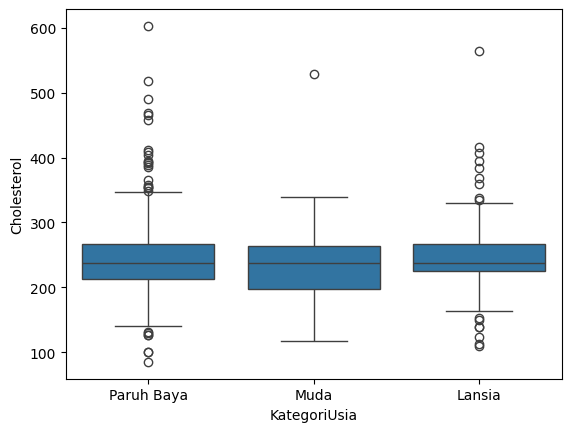

In [ ]:
sns.boxplot(data=jantung_data, x='KategoriUsia', y='Cholesterol')


#### Pertanyaan 2. Kelompok usia mana yang paling rentan terhadap penyakit jantung dan berapa persentase setiap penderita berdasarkan gender?

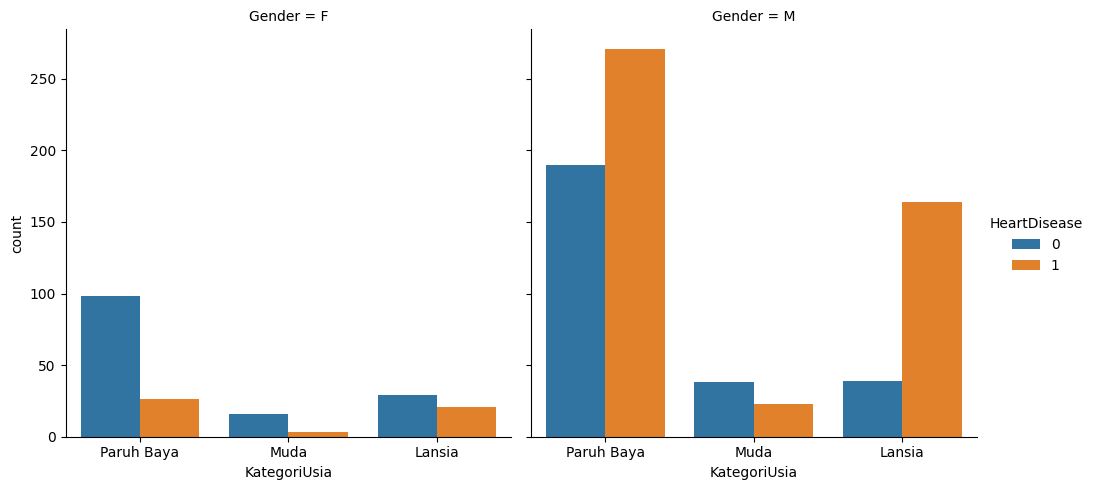

In [ ]:
sns.catplot(data=jantung_data, x='KategoriUsia', hue='HeartDisease', col='Gender', kind='count')


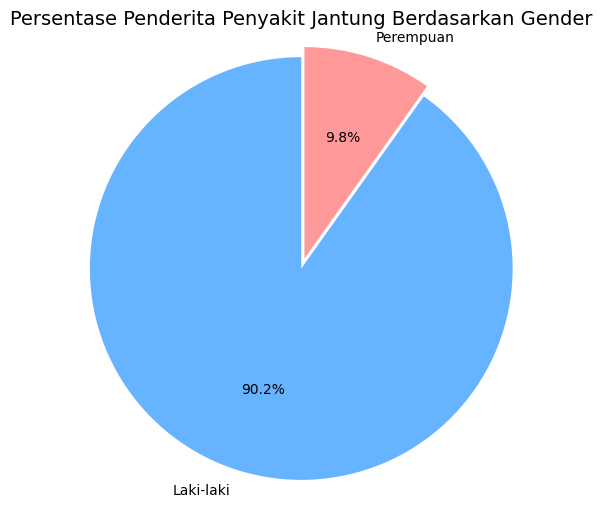

In [ ]:
# Filter hanya pasien yang terkena penyakit jantung
jantung_positif = jantung_data[jantung_data['HeartDisease'] == 1]

# Hitung distribusi gender
gender_dist = jantung_positif['Gender'].value_counts(normalize=True) * 100

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_dist,
    labels=gender_dist.index.map({'M': 'Laki-laki', 'F': 'Perempuan'}),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    explode=(0.05, 0)  # Menonjolkan salah satu jika ingin
)
plt.title('Persentase Penderita Penyakit Jantung Berdasarkan Gender', fontsize=14)
plt.axis('equal')
plt.show()


#### Pertanyaan 3. Apakah Oldpeak lebih tinggi pada kelompok usia tertentu?

<Axes: xlabel='KategoriUsia', ylabel='Oldpeak'>

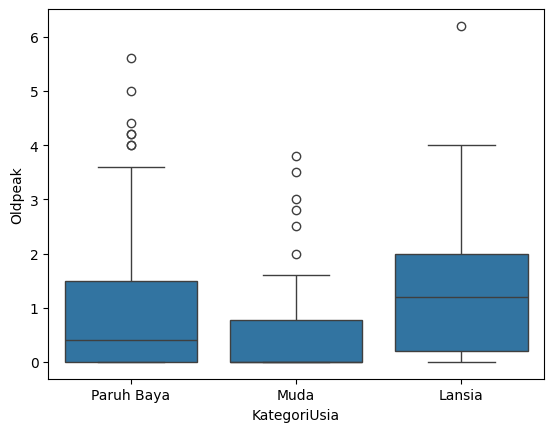

In [ ]:
sns.boxplot(data=jantung_data, x='KategoriUsia', y='Oldpeak')


#### pertanyaan 4. Apakah lansia lebih sering mengalami angina saat olahraga (ExerciseAngina)?

<Axes: xlabel='KategoriUsia', ylabel='count'>

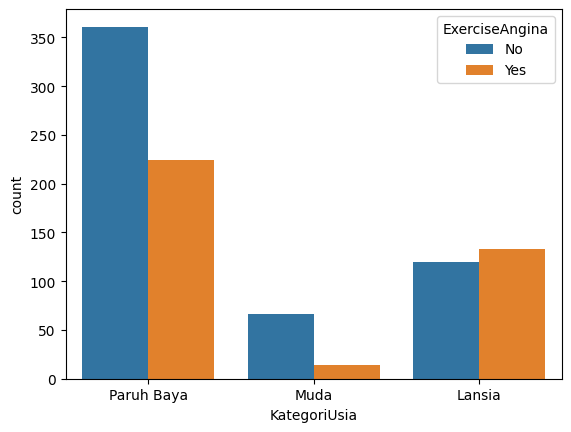

In [ ]:
sns.countplot(data=jantung_data, x='KategoriUsia', hue='ExerciseAngina')


#### pertanyaan 5. Tipe nyeri dada (ChestPainType) apa yang paling umum di tiap kelompok usia dan gender?

<Axes: xlabel='Gender', ylabel='count'>

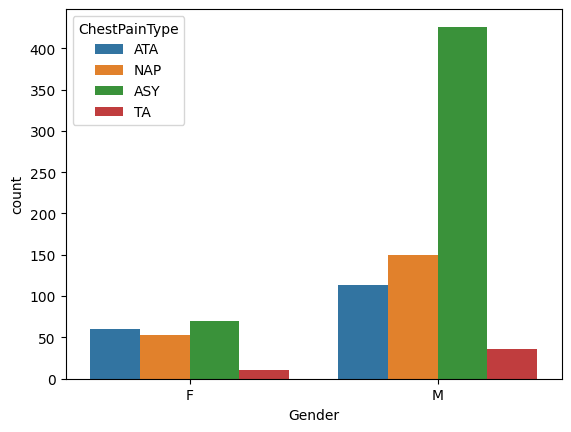

In [ ]:
sns.countplot(data=jantung_data, x='Gender', hue='ChestPainType')


<Axes: xlabel='KategoriUsia', ylabel='count'>

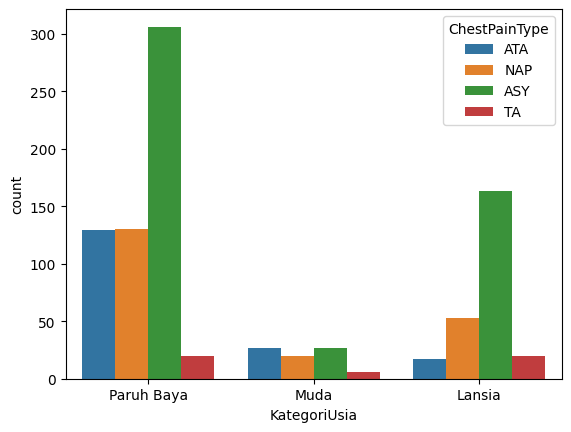

In [ ]:
sns.countplot(data=jantung_data, x='KategoriUsia', hue='ChestPainType')